<a href="https://colab.research.google.com/github/newstage75/python_data_analysis_100knock/blob/main/%E7%AC%AC3%E7%AB%A0/%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%91%E9%A1%A7%E5%AE%A2%E3%81%AE%E5%85%A8%E4%BD%93%E5%83%8F%E3%82%92%E6%8A%8A%E6%8F%A1%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/データサイエンス/20240505python実践データ分析100本ノック/実習用Myフォルダ/第３章')

In [94]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [95]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [96]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [97]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [98]:
# 最初は先頭数行を表示させ、どのようなデータ列が存在するのか、それぞれのデータ列の関係性など、データの大枠を掴むことが重要。
# また、今回はデータの件数を把握するために、len()を用いてデータの表示も行なっている。

In [99]:
# legt_onとright_onが同じ変数名の場合は「on」で省略できる。（２行目にcampaign_idがその例。本当は１行目もonでいける。）
customer_join = pd.merge(customer, class_master, left_on='class', right_on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [100]:
print(len(customer))
print(len(customer_join))

4192
4192


In [101]:
# 欠損値の確認（ジョインする際、キーが見つからないなど、上手くジョインができないと欠損値が自動で入る。）
# end_date（退会日）がないユーザーがあることが確認できた。
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


# ノック23：顧客データの基礎集計をする。

In [102]:
customer_join.groupby('class_name').count()['customer_id']

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


In [103]:
customer_join.groupby('campaign_name').count()['customer_id']


,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


In [104]:
customer_join.groupby('gender').count()['customer_id']

,customer_id
gender,
F,1983
M,2209


In [105]:
customer_join.groupby('is_deleted').count()['customer_id'] #end_dateの欠損2842と一致

,customer_id
is_deleted,
0,2842
1,1350


In [106]:
#キャンペーンコード(CA2：半額)の先頭をチェック
customer_join.loc[customer_join['campaign_id'] == 'CA2'].head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
840,IK123390,XXXXX,C01,F,2016-07-01 00:00:00,NaN,CA2,0,オールタイム,10500,入会費半額
841,HI880150,XXXXX,C03,F,2016-07-01 00:00:00,NaN,CA2,0,ナイト,6000,入会費半額
842,HD528660,XXXXX,C01,F,2016-07-01 00:00:00,NaN,CA2,0,オールタイム,10500,入会費半額
843,HD068817,XXXX,C03,F,2016-07-01 00:00:00,NaN,CA2,0,ナイト,6000,入会費半額
844,TS134180,XXX,C03,M,2016-07-01 00:00:00,NaN,CA2,0,ナイト,6000,入会費半額


In [107]:
#キャンペーンコード(CA2：半額)の末尾をチェック
customer_join.loc[customer_join['campaign_id'] == 'CA2'].tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
3345,HI680854,XXXX,C01,F,2018-06-14 00:00:00,2019-01-31 00:00:00,CA2,1,オールタイム,10500,入会費半額
3346,HD058348,XXXX,C01,M,2018-06-14 00:00:00,2018-11-30 00:00:00,CA2,1,オールタイム,10500,入会費半額
3347,HI312309,XXX,C01,M,2018-06-15 00:00:00,NaN,CA2,0,オールタイム,10500,入会費半額
3348,GD324324,XXX,C02,M,2018-06-15 00:00:00,2019-02-28 00:00:00,CA2,1,デイタイム,7500,入会費半額
3349,TS205006,XXXX,C01,F,2018-06-15 00:00:00,2019-01-31 00:00:00,CA2,1,オールタイム,10500,入会費半額


In [108]:
#キャンペーンコード(CA3：無料)の先頭をチェック
customer_join.loc[customer_join['campaign_id'] == 'CA3'].head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2336,IK524314,XXXX,C01,M,2017-12-01 00:00:00,2018-05-31 00:00:00,CA3,1,オールタイム,10500,入会費無料
2337,TS218627,XXXXX,C02,F,2017-12-01 00:00:00,2018-07-31 00:00:00,CA3,1,デイタイム,7500,入会費無料
2338,GD401728,XXXXX,C01,M,2017-12-01 00:00:00,NaN,CA3,0,オールタイム,10500,入会費無料
2339,PL147335,XXXXXX,C03,M,2017-12-01 00:00:00,NaN,CA3,0,ナイト,6000,入会費無料
2340,IK142972,XXXXX,C01,F,2017-12-01 00:00:00,NaN,CA3,0,オールタイム,10500,入会費無料


In [109]:
#キャンペーンコード(CA3：無料)の末尾をチェック
customer_join.loc[customer_join['campaign_id'] == 'CA3'].tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
3958,PL405819,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,0,オールタイム,10500,入会費無料
3959,HI958991,XXXXX,C01,F,2018-12-15 00:00:00,NaN,CA3,0,オールタイム,10500,入会費無料
3960,IK039344,XXX,C03,M,2018-12-15 00:00:00,NaN,CA3,0,ナイト,6000,入会費無料
3961,TS950243,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,0,オールタイム,10500,入会費無料
3962,AS912483,XX,C03,M,2018-12-15 00:00:00,NaN,CA3,0,ナイト,6000,入会費無料


In [110]:
# customer_master.csvは2019年3月末時点での会員データとなる、ただし2018年度に退会した会員もデータとして存在する。
# ここで、2018年度に入会した人数を確認する。（1361名で、退会の1350人より11名多いことを確認）
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

1361


## ノック24：最新顧客の基礎集計

In [111]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
# 条件をorにすることで、退会したユーザーのうち直近の2019年3月31日退会したユーザーは含むようにする。
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [112]:
# 会員区分
customer_newer.groupby('class_name').size()

,0
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


In [113]:
# ちなみに書籍では、customer_idをカウントしていた。（同様の結果）
customer_newer.groupby('class_name').count()['customer_id']

,customer_id
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


In [114]:
# キャンペーン区分
customer_newer.groupby('campaign_name').size()

,0
campaign_name,
入会費半額,311
入会費無料,242
通常,2400


In [115]:
# 性別毎
customer_newer.groupby('gender').size()

,0
gender,
F,1400
M,1553


## ノック25：利用履歴データを集計

In [116]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [117]:
print(len(uselog))

197428


In [118]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()


In [119]:
uselog_months.head()

,年月,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [120]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [121]:
# エラーが発生したため、count列が数値型か確認
print(uselog_months['count'].dtype)

int64


In [122]:
# uselog_customer = uselog_months.groupby("customer_id")
# print(uselog_customer['count'].dtype)

In [123]:
# uselog_customer.head()

In [124]:
# 顧客毎に絞り込み、月当たりの平均値、中央値、最大値、最小値を集計する。
# pandasのaggメソッドを使うことで、指定の列で集約している。（sum,mean,median,min,max,countなど）
# 数値型に対して、aggは指定しないといけないので、.["count"]は先に持ってくる！
# uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"]).["count"]
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


## ノック２６：利用履歴から定期利用フラグを作成

In [125]:
# 月〜日を0〜6で表示される
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog[995:1005]

,log_id,customer_id,usedate,年月,weekday
995,L00000049013325,TS959147,2018-04-02,201804,0
996,L00000049013326,TS966353,2018-04-02,201804,0
997,L00000049013327,TS969622,2018-04-02,201804,0
998,L00000049013328,TS974079,2018-04-02,201804,0
999,L00000049013329,AS024181,2018-04-03,201804,1
1000,L00000049013330,AS038564,2018-04-03,201804,1
1001,L00000049013331,AS055659,2018-04-03,201804,1
1002,L00000049013332,AS065870,2018-04-03,201804,1
1003,L00000049013333,AS071660,2018-04-03,201804,1
1004,L00000049013334,AS073285,2018-04-03,201804,1


In [126]:
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.head()

,customer_id,年月,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [127]:
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [128]:
# 顧客毎の毎月の最大値を取得し、その最大値が４以上の場合はフラグを立てる
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [129]:
uselog_weekday["routine_flag"] = 0
# ４未満の場合は、元の値である0のまま、異なる場合（4以上）は1を代入
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## ノック27：顧客データと利用履歴データを結合

In [130]:
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [131]:
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [132]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday, on="customer_id", how="left")

In [133]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,5,1


In [134]:
customer_join = customer_join.drop(columns=['count'])
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [135]:
# 念の為、欠損値も確認
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


## ノック２８：会員期間を計算する

In [137]:
# 会員期間はstart_dateとend_dateの差だが、2019年3月までに退会していないユーザーはend_dateが欠損
# よって、ここでは2019年4月30日として会員期間を算出する。
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0

In [138]:
#実験（100行目で）
delta = relativedelta(customer_join["calc_date"].iloc[100], customer_join["start_date"].iloc[100])
delta

relativedelta(years=+3, months=+10, days=+29)

In [139]:
#各行で計算。月単位で集計
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join.loc[i, "membership_period"] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


## ノック29：顧客行動の各種統計量を把握しよう

In [140]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [141]:
# 定期的に利用しているユーザーを確認
customer_join.groupby("routine_flag").count()["customer_id"]

,customer_id
routine_flag,
0,779
1,3413


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

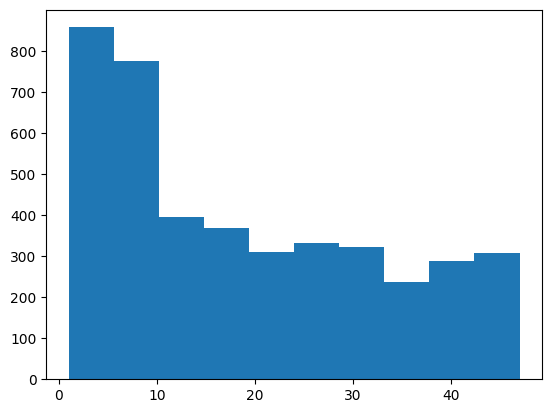

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

## ノック30：退会ユーザーと継続ユーザーの違いを把握する。

In [143]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [144]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [145]:
#　最後に、ここまでしようしたcustomer_joinをcsvにダンプ
customer_join.to_csv("customer_join.csv", index=False)